In [1]:
# Load the CSV file to inspect its structure and contents
import pandas as pd

# Load the data
file_path = 'AusApparalSales4thQrt2020.csv.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())
# Display column information
data.info()

        Date        Time State     Group  Unit  Sales
0  01-Oct-20     Morning    WA      Kids     8  20000
1  01-Oct-20     Morning    WA       Men     8  20000
2  01-Oct-20     Morning    WA     Women     4  10000
3  01-Oct-20     Morning    WA   Seniors    15  37500
4  01-Oct-20   Afternoon    WA      Kids     3   7500
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Read the data
df = pd.read_csv('AusApparalSales4thQrt2020.csv.csv')

# Clean the data
# 1. Strip whitespace from string columns
df = df.apply(lambda x: x.str.strip() if isinstance(x, pd.Series) and x.dtype == 'object' else x)

# 2. Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')

# 3. Add derived columns for analysis
df['Month'] = df['Date'].dt.month_name()
df['Day'] = df['Date'].dt.day_name()
df['Week'] = df['Date'].dt.isocalendar().week

# Basic statistics
print("Dataset Overview:")
print("\
Shape of the dataset:", df.shape)
print("\
Missing values:")
print(df.isnull().sum())
print("\
Basic statistics of numerical columns:")
print(df.describe())

Dataset Overview:
Shape of the dataset: (7560, 9)
Missing values:
Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
Month    0
Day      0
Week     0
dtype: int64
Basic statistics of numerical columns:
              Unit          Sales       Week
count  7560.000000    7560.000000     7560.0
mean     18.005423   45013.558201  46.455556
std      12.901403   32253.506944   3.786662
min       2.000000    5000.000000       40.0
25%       8.000000   20000.000000       43.0
50%      14.000000   35000.000000       46.5
75%      26.000000   65000.000000       50.0
max      65.000000  162500.000000       53.0


In [3]:
# Analyze state-wise revenue
state_revenue = df.groupby('State')['Sales'].sum().sort_values(ascending=False)

# Analyze group-wise revenue
group_revenue = df.groupby('Group')['Sales'].sum().sort_values(ascending=False)

# Analyze time-of-day revenue
time_revenue = df.groupby('Time')['Sales'].sum().sort_values(ascending=False)

# Print the results
print("State-wise Revenue:")
print(state_revenue)

print("\
Group-wise Revenue:")
print(group_revenue)

print("\
Time-of-Day Revenue:")
print(time_revenue)

State-wise Revenue:
State
VIC    105565000
NSW     74970000
SA      58857500
QLD     33417500
TAS     22760000
NT      22580000
WA      22152500
Name: Sales, dtype: int64
Group-wise Revenue:
Group
Men        85750000
Women      85442500
Kids       85072500
Seniors    84037500
Name: Sales, dtype: int64
Time-of-Day Revenue:
Time
Morning      114207500
Afternoon    114007500
Evening      112087500
Name: Sales, dtype: int64


/tmp/ipykernel_107/4037089073.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


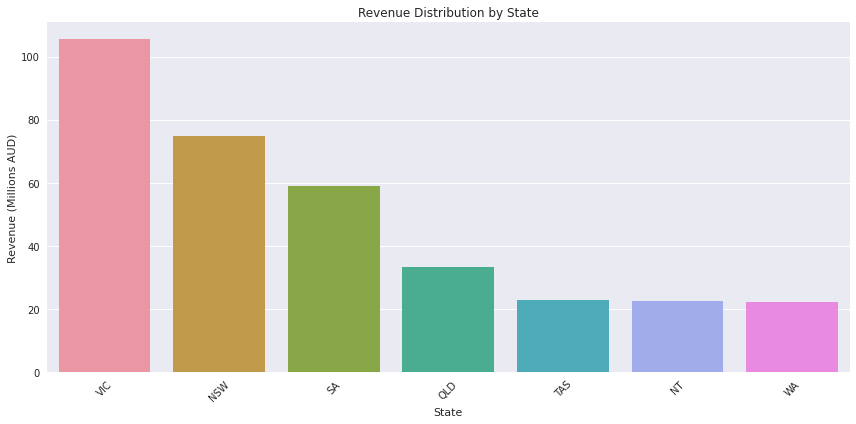

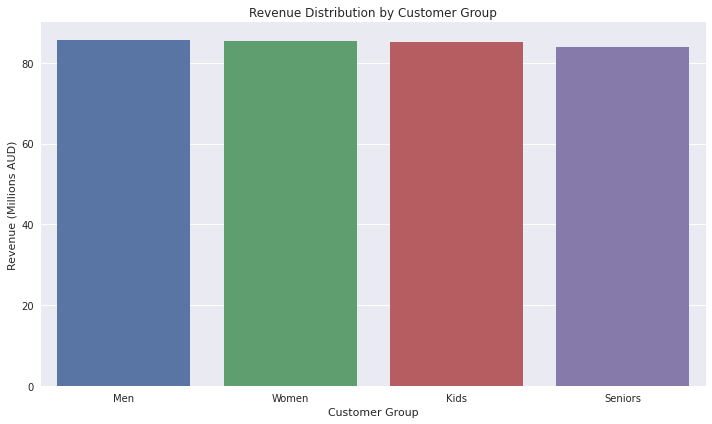

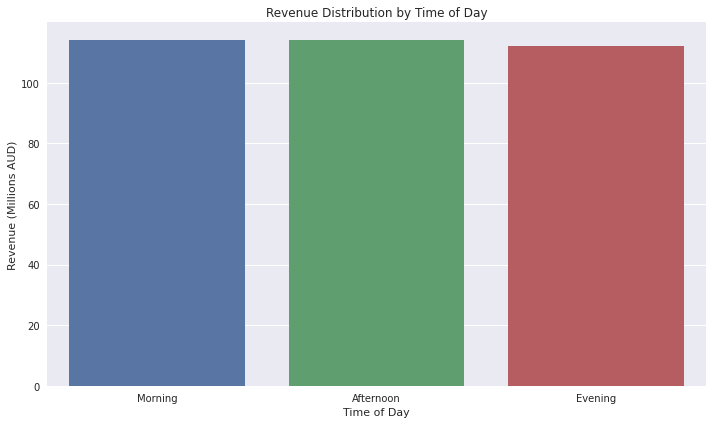

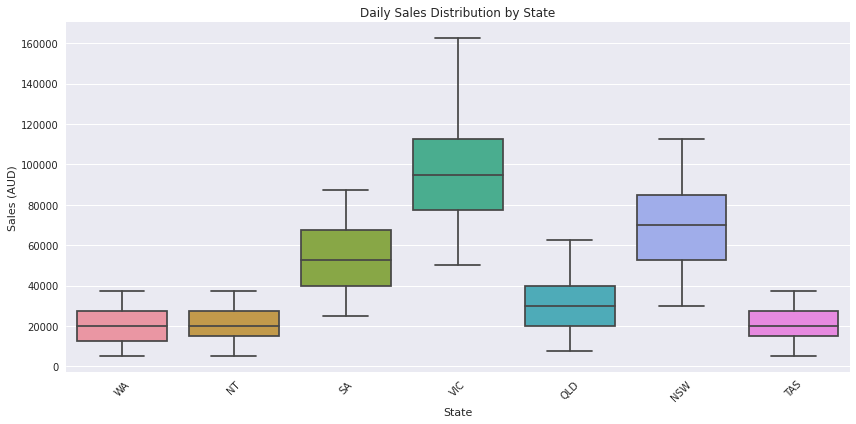

In [4]:
# Create visualizations

# Set the style
plt.style.use('seaborn')

# 1. State-wise Revenue Distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=state_revenue.index, y=state_revenue.values/1000000)
plt.title('Revenue Distribution by State')
plt.xlabel('State')
plt.ylabel('Revenue (Millions AUD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Group-wise Revenue Distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=group_revenue.index, y=group_revenue.values/1000000)
plt.title('Revenue Distribution by Customer Group')
plt.xlabel('Customer Group')
plt.ylabel('Revenue (Millions AUD)')
plt.tight_layout()
plt.show()

# 3. Time of Day Revenue Distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=time_revenue.index, y=time_revenue.values/1000000)
plt.title('Revenue Distribution by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Revenue (Millions AUD)')
plt.tight_layout()
plt.show()

# 4. Box plot of daily sales by state
plt.figure(figsize=(12, 6))
sns.boxplot(x='State', y='Sales', data=df)
plt.title('Daily Sales Distribution by State')
plt.xlabel('State')
plt.ylabel('Sales (AUD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()